#### 1단계: 필요한 라이브러리 및 데이터 불러오기

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
import numpy as np


# 데이터 불러오기
data = pd.read_excel('C:/Users/SAMSUNG/Documents/vscode/2024/ML/프로젝트/data/features_except_GDP.xlsx')

# 데이터 확인
data.head()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4712\3147363533.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,날짜,WTI값,건설수주액(십억원),기계류내수출하지수(선박제외)(증감율),수출입물가비율(증감율),경상수지(증감율),미국생산자물가지수,소비자심리지수_증감률,실업급여지급건수_증감률,...,전체실업률,청년실업율(15~29세),전업생산지수,달러인덱스,미국ISM,미국PMI,미국건설지출,미국고용지표_취업자수 증감률,미국비농업고용자수_증감률,label
0,0,2013-04-01,-0.0388,0.408645,-0.010,0.008,-0.252263,-0.002571,-0.024952,0.061858,...,0.000000,0.040541,0.012346,-0.016372,0.049123,-0.019964,0.00012,0.309859,0.001371,0
1,1,2013-05-01,-0.0159,-0.106928,0.018,0.007,0.906427,0.000000,0.024606,-0.047892,...,0.000000,0.000000,-0.002217,0.020254,-0.113712,-0.040741,-0.00017,0.150538,0.001575,0
2,2,2013-06-01,0.0499,-0.054766,0.001,0.003,-0.289690,-0.000515,0.008646,-0.131500,...,0.033333,-0.038961,-0.003333,-0.000896,-0.064151,0.013514,0.00004,-0.163551,0.001315,0
3,3,2013-07-01,0.0877,0.063279,0.004,-0.003,0.020484,0.000516,-0.002857,0.134213,...,0.032258,0.094595,-0.002230,-0.021855,0.018145,0.000000,0.00005,-0.318436,0.000895,0
4,4,2013-08-01,0.0249,-0.031061,-0.023,-0.005,-0.082603,0.003093,0.001910,-0.088000,...,0.000000,0.024691,0.007821,0.007595,0.073267,0.028571,-0.00006,0.991803,0.001782,0


#### 2단계: 데이터 전처리
- 데이터셋을 피쳐(X)와 타겟(y) 변수로 분리합니다. 이 예에서는 타겟 변수 이름을 'GDP'라고 가정합니다. 실제로는 해당 데이터에 맞는 컬럼 이름을 사용해야 합니다

In [3]:
# 데이터 컬럼 확인
print(data.columns)

Index(['Unnamed: 0', '날짜', 'WTI값', '건설수주액(십억원)', '기계류내수출하지수(선박제외)(증감율)',
       '수출입물가비율(증감율)', '경상수지(증감율)', '미국생산자물가지수', '소비자심리지수_증감률', '실업급여지급건수_증감률',
       '전국_종합매매가격지수_증감률', '전체임금총액_증감률', '불변증감률', '계절증감률', '전체실업률',
       '청년실업율(15~29세)', '전업생산지수', '달러인덱스', '미국ISM', '미국PMI', '미국건설지출',
       '미국고용지표_취업자수 증감률', '미국비농업고용자수_증감률', 'label'],
      dtype='object')


In [4]:
# 타겟 변수와 피쳐 분리
X = data.drop(['Unnamed: 0', '날짜', 'label'], axis=1)  
y = data['label']

# 데이터 분할: 훈련 세트와 테스트 세트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
X_train.shape

(103, 21)

#### 3단계:라쏘 회귀 모델을 이용한 피쳐 선택

In [6]:
# 라쏘 회귀 모델 훈련 (교차 검증 포함)
from sklearn.linear_model import LogisticRegression
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
log_clf = LogisticRegression(C = 10, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',random_state=42)
# 선택된 피쳐 확인 (계수가 0이 아닌 피쳐)

log_clf.fit(X_train, y_train)
# selected_features = X.columns[lasso.coef_ != 0]
# print("선택된 피쳐:", selected_features)

LogisticRegression(C=10, class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

In [7]:
log_clf.coef_

array([[ 1.57246047,  0.18470494,  0.        ,  0.        , -0.00848645,
         0.01921013,  0.        ,  0.65078667,  0.        ,  0.        ,
         0.21073897,  0.        ,  0.        , -1.67591224,  0.        ,
         0.        ,  3.44214314,  0.        ,  0.        , -0.04190025,
         0.        ]])

In [8]:
# 데이터 프레임 생성
# X.columns은 모델에 사용된 피쳐의 이름을 가지고 있어야 합니다.
# log_clf.coef_는 배열 형태로 계수를 가지고 있습니다. 로지스틱 회귀에서는 coef_가 2차원 배열 형태로 반환됩니다.

coef_df = pd.DataFrame(log_clf.coef_.flatten(), index=X.columns, columns=['Coefficients'])

# 계수를 절대값 크기로 정렬
coef_df = coef_df.abs().sort_values(by='Coefficients', ascending=False)

# 결과 출력
print(coef_df)

                      Coefficients
미국ISM                     3.442143
청년실업율(15~29세)             1.675912
WTI값                      1.572460
실업급여지급건수_증감률              0.650787
불변증감률                     0.210739
건설수주액(십억원)                0.184705
미국고용지표_취업자수 증감률           0.041900
미국생산자물가지수                 0.019210
경상수지(증감율)                 0.008486
소비자심리지수_증감률               0.000000
전국_종합매매가격지수_증감률           0.000000
전체임금총액_증감률                0.000000
계절증감률                     0.000000
전체실업률                     0.000000
수출입물가비율(증감율)              0.000000
전업생산지수                    0.000000
달러인덱스                     0.000000
기계류내수출하지수(선박제외)(증감율)      0.000000
미국PMI                     0.000000
미국건설지출                    0.000000
미국비농업고용자수_증감률             0.000000


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
C:\Users\SAMSUNG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SAMSUNG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumBarunGothic' not found.
C:\Users\SAMSUNG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.

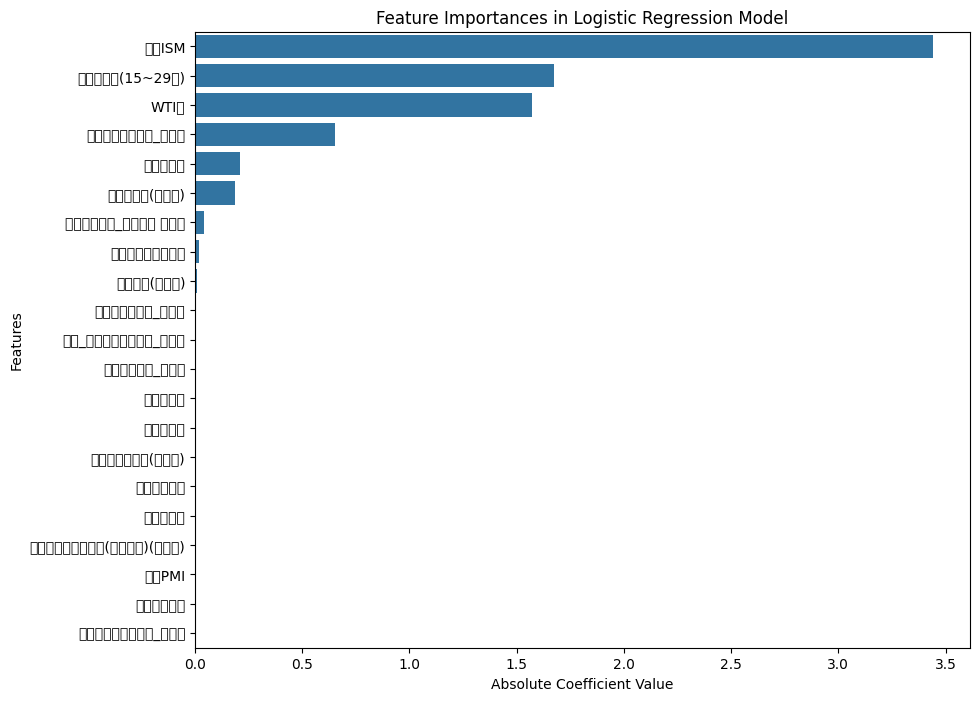

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 계수의 크기에 따라 바 차트를 그립니다.
plt.rc('font', family='NanumBarunGothic')  # 'NanumBarunGothic' 대신 사용할 폰트 이름을 입력
plt.figure(figsize=(10, 8))
sns.barplot(x=coef_df['Coefficients'], y=coef_df.index)
plt.title('Feature Importances in Logistic Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.show()